<AxesSubplot:title={'center':'multiple stacked bar plot'}>

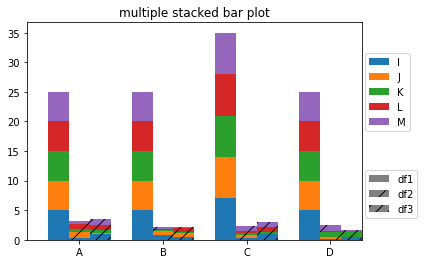

In [66]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Divider
from prompt_toolkit.data_structures import Size


def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot", H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall:  # for each data frame
        axe = df.plot(
            kind="bar",
            linewidth=0,
            stacked=True,
            ax=axe,
            legend=False,
            grid=False,
            **kwargs
        )  # make bar plots

    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i + n_col]):
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))  #edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n = []
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    axe.add_artist(l1)
    return axe


# create fake dataframes
df1 = pd.DataFrame(
    [
        [5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5],
        [7, 7, 7, 7, 7],
        [5, 5, 5, 5, 5],
    ],
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)
df2 = pd.DataFrame(
    np.random.rand(4, 5),
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)
df3 = pd.DataFrame(
    np.random.rand(4, 5),
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)

# Then, just call :
plot_clustered_stacked([df1, df2, df3], ["df1", "df2", "df3"])


0
-0.3
0.8999999999999999
2.1
3.3
4.5
5.7
6.8999999999999995
8.1
-0.3
0.8999999999999999
2.1
3.3
4.5
5.7
6.8999999999999995
8.1
2
-0.15714285714285714
1.0428571428571427
2.242857142857143
3.4428571428571426
4.642857142857143
5.842857142857143
7.042857142857143
8.242857142857142
-0.15714285714285714
1.0428571428571427
2.242857142857143
3.4428571428571426
4.642857142857143
5.842857142857143
7.042857142857143
8.242857142857142
4
-0.01428571428571429
1.1857142857142855
2.3857142857142857
3.5857142857142854
4.785714285714286
5.985714285714286
7.185714285714285
8.385714285714286
-0.01428571428571429
1.1857142857142855
2.3857142857142857
3.5857142857142854
4.785714285714286
5.985714285714286
7.185714285714285
8.385714285714286
6
0.12857142857142856
1.3285714285714285
2.5285714285714285
3.728571428571428
4.928571428571429
6.128571428571429
7.328571428571428
8.528571428571428
0.12857142857142856
1.3285714285714285
2.5285714285714285
3.728571428571428
4.928571428571429
6.128571428571429
7.328571

<Axes:>

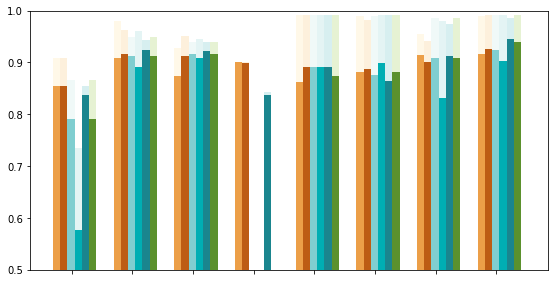

In [114]:
from itertools import islice, cycle
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Divider, Size

my_colors = {}
for i in range(12):
    my_colors[i] = {}

# fruit stripe
# my_colors[0][0] = '#DD5143'
# my_colors[0][1] = '#FFE2D2'
# my_colors[2][0] = '#7CB82F'
# my_colors[2][1] = '#E5EFC7'
# my_colors[4][0] = '#8D6CAB'
# my_colors[4][1] = '#F0E3EF'
# my_colors[6][0] = '#00AEB3'
# my_colors[6][1] = '#D2ECEB'
# my_colors[8][0] = '#EDB220'
# my_colors[8][1] = '#FAF0B5'
# my_colors[10][0] = '#86888A'
# my_colors[10][1] = '#E0E2E4'

my_colors[0][0] = '#EC9F48'
my_colors[0][1] = '#FFEBB650'
my_colors[2][0] = '#BD5C14'
my_colors[2][1] = '#F9D29150'
my_colors[4][0] = '#80CED0'
my_colors[4][1] = '#D2ECEB50'
my_colors[6][0] = '#00AEB3'
my_colors[6][1] = '#A9DDDD50'
my_colors[8][0] = '#1A858E'
my_colors[8][1] = '#80CED050'
my_colors[10][0] = '#5B912D'
my_colors[10][1] = '#B0D77550'


def plot_clustered_stacked_revised(dfs, labels=None, H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    df_count = len(dfs)
    df_column_count = len(dfs[0].columns)
    n_ind = len(dfs[0].index)
    fig = plt.figure(figsize=(8, 4))
    handles = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
    v = [Size.Fixed(0.7), Size.Scaled(1.), Size.Fixed(.5)]
    divider = Divider(fig, (0, 0, 1, 1), handles, v, aspect=False)

    rect_main = [.1, .1, .9, .9]
    axe = plt.axes(rect_main)
    box = axe.get_position()
    plt.margins(x=2)
    # axe = fig.add_axes(divider.get_position(),
    #               axes_locator=divider.new_locator(nx=1, ny=1))
    # axe = plt.subplot(111)

    for df in dfs:  # for each data frame
        # my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(df)))
        axe = df.plot(
            kind="bar",
            linewidth=0,
            stacked=True,
            ax=axe,
            legend=False,
            grid=False,
            **kwargs,
        )  # make bar plots
        # axe.set_position([box.x0, box.y0, box.width, box.height])
        axe.margins(x=2)

    handles, labels = axe.get_legend_handles_labels()  # get the handles we want to modify
    for col in range(0, df_count * df_column_count, df_column_count):  # len(h) = n_col * n_df
        print(col)
        for index, pa in enumerate(handles[col:col + df_column_count]):
            for rect in pa.patches:  # for each index
                # rect.set_x(rect.get_x() + 1 / float(df_count + 1) * col / float(df_column_count))
                x_location = rect.get_x() * 1.2 + 1 / float(df_count + 1) * col / float(df_column_count)
                print(x_location)
                rect.set_x(x_location)
                # rect.set_hatch(H * int(col / df_column_count))  #edited part
                rect.set_width(1 / float(df_count + 1))
                rect.set_color(my_colors[col][index])

    plt.margins(x=20)
    axe.margins(x=20)
    axe.set_ylim(0.5, 1)
    axe.set_xlim(-0.75, 9.5)
    axe.set_xticks((np.arange(0, 2 * n_ind, 2) * 1.2 + 1 / float(df_count + 1)) / 2.)
    # axe.set_xticklabels(df.index, rotation=0)
    # axe.set_title(title)

    # Add invisible data to add another legend
    # n = []
    # for i in range(df_count):
    #     n.append(axe.bar(0, 0, color="gray", hatch=H * i))
    #
    # l1 = axe.legend(h[:df_column_count], l[:df_column_count], loc=[1.01, 0.5])
    # if labels is not None:
    #     l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    # axe.add_artist(l1)
    return axe

stack_labels = [
    "Test",
    "Train"
]

group_names = [
    "KNN",
    "LogReg",
    "Linear SVC",
    "Multi-NB",
    "Random Forest",
    "GBRT",
    "KSVM",
    "MLP"
]
df1 = pd.DataFrame(
    np.array(
        [
            [0.8536036036, 0.05569217104],
            [0.9076576577, 0.07149727192],
            [0.8738738739, 0.05345006979],
            [0.9009009009, 0.0005075498033],
            [0.8626126126, 0.1289366832],
            [0.8806306306, 0.108665144],
            [0.9144144144, 0.04107854333],
            [0.9166666667, 0.07375586854],
        ],
    ),
    index=group_names,
    columns=stack_labels
)

df2 = pd.DataFrame(
    np.array(
        [
            [0.8536036036, 0.05569217104],
            [0.9166666667, 0.04502347418],
            [0.9121621622, 0.03938713361],
            [0.8986486486, 0.002759802056],
            [0.8918918919, 0.09965740388],
            [0.8873873874, 0.0945844436],
            [0.9009009009, 0.0405075498],
            [0.9256756757, 0.0658736201],
        ],
    ),
    index=group_names,
    columns=stack_labels
)

df3 = pd.DataFrame(
    np.array(
        [
            [0.7905405405, 0.0759383327],
            [0.9121621622, 0.0365702322],
            [0.9166666667, 0.02248826291],
            [0.0, 0.0],
            [0.8918918919, 0.09965740388],
            [0.8761261261, 0.1142964091],
            [0.9076576577, 0.07713107474],
            [0.9234234234, 0.06756249207],
        ],
    ),
    index=group_names,
    columns=stack_labels
)
df4 = pd.DataFrame(
    np.array(
        [
            [0.5765765766, 0.1591980713],
            [0.8918918919, 0.06867148839],
            [0.9076576577, 0.03713107474],
            [0.0, 0],
            [0.8918918919, 0.09965740388],
            [0.8986486486, 0.09290064713],
            [0.8310810811, 0.1497639893],
            [0.9031531532, 0.08783276234],
        ],
    ),
    index=group_names,
    columns=stack_labels
)
df5 = pd.DataFrame(
    np.array(
        [
            [0.8378378378, 0.01737342977],
            [0.9234234234, 0.01911178784],
            [0.9211711712, 0.01798375841],
            [0.8378378378, 0.004979063571],
            [0.8918918919, 0.09965740388],
            [0.8648648649, 0.1261210506],
            [0.9121621622, 0.06192234488],
            [0.9459459459, 0.03884278645],
        ],
    ),
    index=group_names,
    columns=stack_labels
)
df6 = pd.DataFrame(
    np.array(
        [
            [0.7905405405, 0.07650171298],
            [0.9121621622, 0.0365702322],
            [0.9166666667, 0.02248826291],
            [0.0, 0.0],
            [0.8738738739, 0.1176754219],
            [0.8806306306, 0.1109186651],
            [0.9076576577, 0.07713107474],
            [0.9391891892, 0.0517967263],
        ],
    ),
    index=group_names,
    columns=stack_labels
)

# Then, just call :
plot_clustered_stacked_revised(
    [df1, df2, df3, df4, df5, df6], ["df1", "df2", "df3", "df4", "df5", "df6"], cmap=plt.cm.viridis
)


<AxesSubplot:xlabel='gender'>

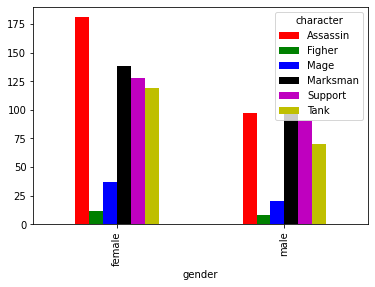

In [11]:
import pandas as pd

# try to simulate your data
characters = 'Tank Support Marksman Mage Figher Assassin'.split(' ')
random_weight = abs(np.random.randn(len(characters)))
random_weight = random_weight / random_weight.sum()
gender = 'male female'.split(' ')

index1 = np.random.choice(characters, size=1000, p=random_weight)
index2 = np.random.choice(gender, size=1000, p=[0.4, 0.6])
multi_index = pd.MultiIndex.from_tuples(list(zip(index1, index2)), names=['character', 'gender'])

data = pd.DataFrame(np.random.randn(1000), columns=['value'], index=multi_index)
data.reset_index(inplace=True)

# do your groupby
group_counts = data.groupby(['character', 'gender']).count().reset_index()
# do pivot table
table = pd.pivot_table(group_counts, index='gender', columns='character', values='value')
# set your own colors here
table.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y'])